# Granger Causality test

You run Granger Causality test to check if a time series causes or is correlated to another time series. [Video tutorial](https://www.youtube.com/watch?v=4TkNZviNJC0)

In [1]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
# Build a time series, just a simple AR(1)
t1 = [0.1 * np.random.normal()]
for _ in range(100):
    t1.append(0.5 * t1[-1] + 0.1 * np.random.normal())
t1[:5]

[-0.08657429907952796,
 -0.2026672549860835,
 -0.1808120896825176,
 0.08144536207826872,
 -0.0221841392556565]

In [3]:
# Build another time series Granger-caused by the first one
t2 = [item + 0.1 * np.random.normal() for item in t1]

In [4]:
# Adjust t1 and t2
t1 = t1[3:]
t2 = t2[:-3]

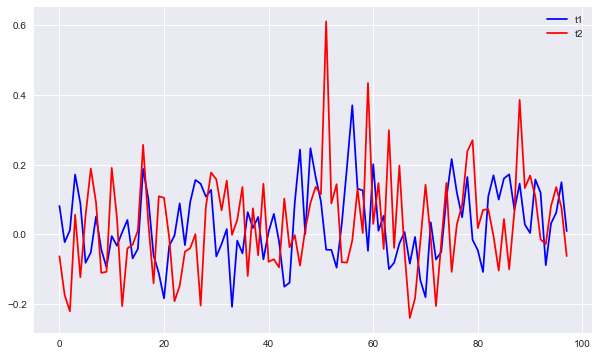

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(t1, color='b', label='t1')
plt.plot(t2, color='r', label='t2')
plt.legend()

In [6]:
# We create a DataFrame to run the test, with only two columns
### Very important point
# The first column is being Granger caused by the second one, so we put t2, t1
df = pd.DataFrame(columns=['t2', 't1'], data=zip(t2, t1))
df.head()

,t2,t1
0,-0.062619,0.081445
1,-0.173510,-0.022184
2,-0.219969,0.011675
3,0.056439,0.171264
4,-0.122629,0.088686


In [7]:
granger = grangercausalitytests(df, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7516  , p=0.3882  , df_denom=94, df_num=1
ssr based chi2 test:   chi2=0.7756  , p=0.3785  , df=1
likelihood ratio test: chi2=0.7725  , p=0.3794  , df=1
parameter F test:         F=0.7516  , p=0.3882  , df_denom=94, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2269  , p=0.1137  , df_denom=91, df_num=2
ssr based chi2 test:   chi2=4.6985  , p=0.0954  , df=2
likelihood ratio test: chi2=4.5872  , p=0.1009  , df=2
parameter F test:         F=2.2269  , p=0.1137  , df_denom=91, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=27.5752 , p=0.0000  , df_denom=88, df_num=3
ssr based chi2 test:   chi2=89.3059 , p=0.0000  , df=3
likelihood ratio test: chi2=62.9584 , p=0.0000  , df=3
parameter F test:         F=27.5752 , p=0.0000  , df_denom=88, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=19.9230 , p=0.0000  , df_d